### 2.1 Creating the Base Class


In [ ]:
import math
class SignalProcessor ( object ):
    def __init__ ( self , data ):
        self . data = data
    

### 2.2 Creating the Sine Wave Function

*super()* helps initialize data through the parent class, while *amplitude* and *frequency* are local to the child class and updated within its *__init__*

In [73]:
class SineWaveFunction ( SignalProcessor ):
    def __init__ ( self , amplitude , frequency ):
        super () . __init__ ([])
        self . amplitude = amplitude
        self . frequency = frequency
    
    

### 2.3 Making Objects Callable

The *_call_* function is invoked when the class name is used with the call operator *()*

In [74]:
    def __call__(self,duration):
        self.data = []
        for i in range(duration):
            self.data.append(self.amplitude * math.sin(2*math.pi*self.frequency*i))
        print(f"Sine wave data:{self.data}")
    
    def __len__(self):
        return len(self.data)
    
    
    


### 2.4 Making Objects Iterable

The __iter__ method resets the index to zero and returns the object itself, satisfying the iterator protocol. The __next__ method retrieves the current value, advances the index, and raises StopIteration when the list is exhausted

In [75]:
    def __iter__(self):
        self.index = 0 
        return self
    
    def __next__(self):
        if self.index >= len(self.data):
            raise StopIteration
        current_value = self.data[self.index]
        self.index += 1
        return current_value
    
    

### 2.6 Comparing Signals

The *eq* function here checks first whether the number of samples in *data* for both the signals are the same. If not it checks for the number of signals that are same with a tolerance of 0.01.

In [76]:
    def __eq__(self,b):
        count = 0
        if len(self.data) != len(b.data):
            raise ValueError("Two signals are not equal in length")
        else:
            for i in range(len(self.data)):
                if abs(self.data[i]-b.data[i])<0.01:
                    count += 1
            return count

In [86]:
class SineWaveFunction ( SignalProcessor ):
    def __init__ ( self , amplitude , frequency ):
        super () . __init__ ([])
        self . amplitude = amplitude
        self . frequency = frequency
    def __call__(self,duration):
        self.data = []
        for i in range(duration):
            self.data.append(self.amplitude * math.sin(2*math.pi*self.frequency*i))
        print(f"Sine wave data:{self.data}")
    
    def __len__(self):
        return len(self.data)
    
    def __iter__(self):
        self.index = 0 
        return self
    
    def __next__(self):
        if self.index >= len(self.data):
            raise StopIteration
        current_value = self.data[self.index]
        self.index += 1
        return current_value
    
    def __eq__(self,b):
        count = 0
        if len(self.data) != len(b.data):
            raise ValueError("Two signals are not equal in length")
        else:
            for i in range(len(self.data)):
                if abs(self.data[i]-b.data[i])<0.01:
                    count += 1
            return count

### 2.5 Square Wave Function:

*SquareWaveFunction* would inherit from *SineWaveFunction* as both of them have *amplitude*, *frequency* and *data* values.
The data values generated from *SineWaveFunction* are then used to reinitialize data values for *SquareWaveFunction*

In [99]:
class SquareWaveFunction ( SineWaveFunction ):
    def __init__ ( self , amplitude , frequency ):
        super (SquareWaveFunction,self) . __init__ ( 1 , frequency )
        self . amplitude = amplitude
    
    def __call__(self,duration):
        super(). __call__(duration)
        for i in range(len(self.data)):
            if self.data[i] >= 0:
                self.data[i] = self.amplitude
            else:
                self.data[i] = -self.amplitude
        print(f"Square wave data:{self.data}")
    

### 2.7 Demonstration:

![alt text](image.png)


In [102]:
SG = SineWaveFunction(amplitude =1.0 ,frequency =1)
SG (duration = 5)
SG = SquareWaveFunction(amplitude =3.0 ,frequency =1)
SG (duration = 5)


Sine wave data:[0.0, -2.4492935982947064e-16, -4.898587196589413e-16, -7.347880794884119e-16, -9.797174393178826e-16]
Sine wave data:[0.0, -7.347880794884119e-16, -1.4695761589768238e-15, -2.204364238465236e-15, -2.9391523179536475e-15]
Square wave data:[3.0, -3.0, -3.0, -3.0, -3.0]


![alt text](image-1.png)

In [103]:
SG = SineWaveFunction(amplitude=1.0, frequency=1.1)
SG(duration=10)
SG = SineWaveFunction(amplitude=1.0, frequency=0.1)
SG(duration=10)

Sine wave data:[0.0, 0.5877852522924736, 0.951056516295154, 0.9510565162951528, 0.5877852522924711, -2.2056021997384123e-15, -0.5877852522924776, -0.9510565162951541, -0.9510565162951521, -0.5877852522924665]
Sine wave data:[0.0, 0.5877852522924731, 0.9510565162951535, 0.9510565162951536, 0.5877852522924732, 1.2246467991473532e-16, -0.587785252292473, -0.9510565162951535, -0.9510565162951536, -0.5877852522924734]


### 3.1 Composite signal function

Here, we define a class to handle signal addition. 

The CompositeSignalFunction accepts a list of other signal objects (like sine or square waves) and sums them up. 

The __call__ method handles the logic in two steps: first, it ensures all input waves are generated for the given duration, and then it accumulates their values into a single data list to create the composite output.

In [105]:
class CompositeSignalFunction ( SignalProcessor ):
    def __init__ ( self , inputs ):
        super () . __init__ ([])
        self.inputs = inputs
    
    def __call__(self,duration):
        self.data = [0]*duration
        for waves in self.inputs:
            waves(duration)
        for i in range(duration):
            for waves in self.inputs:
                self.data[i]+=waves.data[i]
        print(f"Composite signal data:{self.data}")

In [107]:
SG = SineWaveFunction ( amplitude = 1.0 , frequency = 0.1)
SW = SquareWaveFunction ( amplitude = 0.5 , frequency = 0.05)
CSG = CompositeSignalFunction ( inputs = [ SG , SW ] )
CSG ( duration = 10 )

Sine wave data:[0.0, 0.5877852522924731, 0.9510565162951535, 0.9510565162951536, 0.5877852522924732, 1.2246467991473532e-16, -0.587785252292473, -0.9510565162951535, -0.9510565162951536, -0.5877852522924734]
Sine wave data:[0.0, 0.1545084971874737, 0.29389262614623657, 0.4045084971874737, 0.47552825814757677, 0.5, 0.4755282581475768, 0.4045084971874737, 0.2938926261462366, 0.15450849718747375]
Square wave data:[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Composite signal data:[0.5, 1.0877852522924731, 1.4510565162951536, 1.4510565162951536, 1.0877852522924734, 0.5000000000000001, -0.08778525229247303, -0.45105651629515353, -0.45105651629515364, -0.08778525229247336]


### 3.2 Signal Visualization

The following code creates a visualization for all the signals generated, step by step, in code cells:

First we generate all three signals for a duration of 80 timesteps

In [108]:
SG = SineWaveFunction ( amplitude = 1.0 , frequency = 0.1)
SW = SquareWaveFunction ( amplitude = 0.5 , frequency = 0.05)
CSG = CompositeSignalFunction ( inputs = [ SG , SW ] )
CSG ( duration = 80 )


Sine wave data:[0.0, 0.5877852522924731, 0.9510565162951535, 0.9510565162951536, 0.5877852522924732, 1.2246467991473532e-16, -0.587785252292473, -0.9510565162951535, -0.9510565162951536, -0.5877852522924734, -2.4492935982947064e-16, 0.5877852522924729, 0.9510565162951535, 0.9510565162951536, 0.5877852522924734, 3.6739403974420594e-16, -0.5877852522924728, -0.9510565162951534, -0.9510565162951538, -0.5877852522924735, -4.898587196589413e-16, 0.5877852522924727, 0.9510565162951534, 0.9510565162951538, 0.5877852522924736, 6.123233995736766e-16, -0.5877852522924726, -0.9510565162951534, -0.9510565162951538, -0.5877852522924737, -7.347880794884119e-16, 0.5877852522924725, 0.9510565162951533, 0.9510565162951539, 0.5877852522924738, 8.572527594031472e-16, -0.5877852522924725, -0.9510565162951533, -0.9510565162951539, -0.5877852522924739, -9.797174393178826e-16, 0.5877852522924724, 0.9510565162951533, 0.9510565162951539, 0.587785252292474, 1.102182119232618e-15, -0.5877852522924722, -0.9510565

We now create a canvas for two plots in matplotlib, one for the time domain analysis and the other for frequency domain analysis.




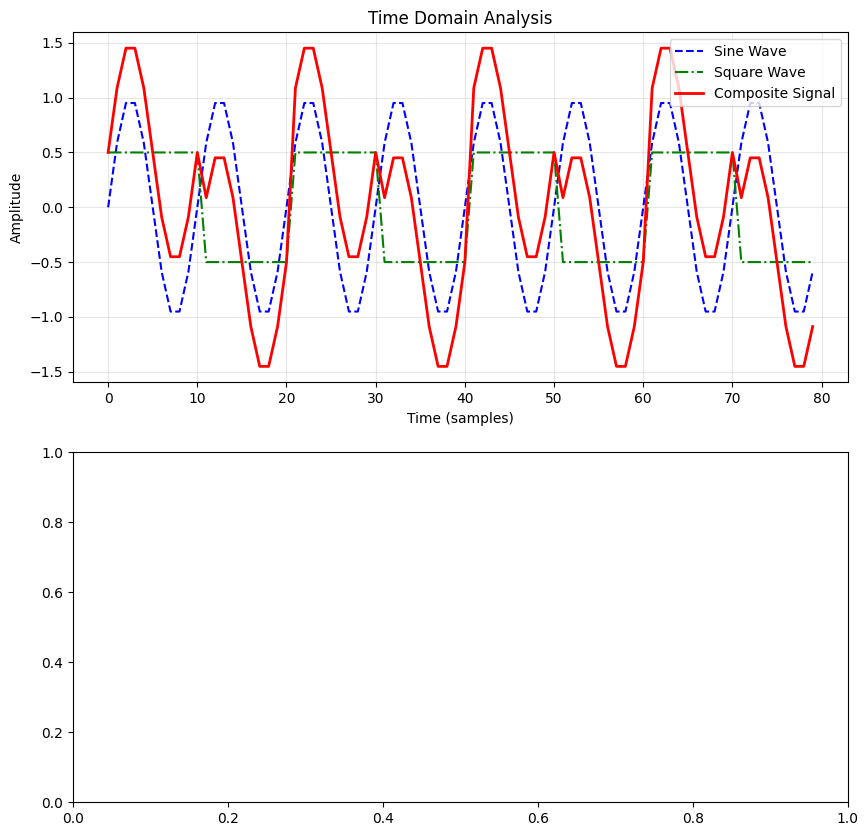

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

time_axis = range(80)

ax1.plot(time_axis, SG.data, label='Sine Wave', color='blue', linestyle='--')
ax1.plot(time_axis, SW.data, label='Square Wave', color='green', linestyle='-.')
ax1.plot(time_axis, CSG.data, label='Composite Signal', color='red', linewidth=2)

ax1.set_title('Time Domain Analysis')
ax1.set_xlabel('Time (samples)')
ax1.set_ylabel('Amplitude')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)



### Codebase

In [ ]:
import math

class SignalProcessor ( object ):
    def __init__ ( self , data ):
        self . data = data

class SineWaveFunction ( SignalProcessor ):
    def __init__ ( self , amplitude , frequency ):
        super () . __init__ ([])
        self . amplitude = amplitude
        self . frequency = frequency
    def __call__(self,duration):
        self.data = []
        for i in range(duration):
            self.data.append(self.amplitude * math.sin(2*math.pi*self.frequency*i))
        print(f"Sine wave data:{self.data}")
    
    def __len__(self):
        return len(self.data)
    
    def __iter__(self):
        self.index = 0 
        return self
    
    def __next__(self):
        if self.index >= len(self.data):
            raise StopIteration
        current_value = self.data[self.index]
        self.index += 1
        return current_value
    
    def __eq__(self,b):
        count = 0
        if len(self.data) != len(b.data):
            raise ValueError("Two signals are not equal in length")
        else:
            for i in range(len(self.data)):
                if abs(self.data[i]-b.data[i])<0.01:
                    count += 1
            return count

class SquareWaveFunction ( SineWaveFunction ):
    def __init__ ( self , amplitude , frequency ):
        super (SquareWaveFunction,self) . __init__ ( 1 , frequency )
        self . amplitude = amplitude
    
    def __call__(self,duration):
        super(). __call__(duration)
        for i in range(len(self.data)):
            if self.data[i] >= 0:
                self.data[i] = self.amplitude
            else:
                self.data[i] = -self.amplitude
        print(f"Square wave data:{self.data}")
    


Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]
Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]
5
Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]
[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]
Sine wave data:[0.0, 1.7633557568774194, 2.8531695488854605, 2.853169548885461, 1.7633557568774196]
Square wave data:[3.0, 3.0, 3.0, 3.0, 3.0]
5
[3.0, 3.0, 3.0, 3.0, 3.0]
Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]
Sine wave data:[0.0, 1.618033988749895, 1.9021130325903073, 0.618033988749895, -1.175570504584946]
2
Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307]


ValueError: Two signals are not equal in length

In [89]:
SG1 = SineWaveFunction(amplitude =2.0 ,frequency =0.1)
SG1 (duration = 5)

Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]


In [90]:
SG = SineWaveFunction(amplitude =2.0 ,frequency =0.1)
SG ( duration =5 ) # Create and print the sine wave
print (len( SG ) )

Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]
5


In [91]:
SG = SineWaveFunction(amplitude =2.0 ,frequency =0.1)
SG(duration =5 )
print([val for val in SG]) 

Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]
[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]


In [92]:
SW = SquareWaveFunction(amplitude =3.0 , frequency =0.1)
SW(duration =5 )
print(len( SW ) ) # Output : 5
print([val for val in SW]) 

Sine wave data:[0.0, 0.5877852522924731, 0.9510565162951535, 0.9510565162951536, 0.5877852522924732]
5
[0.0, 0.5877852522924731, 0.9510565162951535, 0.9510565162951536, 0.5877852522924732]


In [93]:
SG1 = SineWaveFunction (amplitude =2.0 , frequency =0.1)
SG1 (duration =5)
SG2 = SineWaveFunction ( amplitude =2.0 , frequency =0.15 )
SG2 ( duration =5 )
print ( SG1 == SG2 ) # Output : number of matching elements
SG3 = SineWaveFunction ( amplitude =2.0 , frequency =0.1 )
SG3(duration =3)
print(SG1 == SG3) 

Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307, 1.9021130325903073, 1.1755705045849465]
Sine wave data:[0.0, 1.618033988749895, 1.9021130325903073, 0.618033988749895, -1.175570504584946]
2
Sine wave data:[0.0, 1.1755705045849463, 1.902113032590307]


ValueError: Two signals are not equal in length